In [31]:
import numpy as np
import pandas as pd
from pathlib import Path

saveyn= True
n_samples=  1000
f_df = Path('../data/PriorModel/Dist_table.xlsx')
output_dir = f_df.parent

df = pd.read_excel(f_df).loc[:,['Parameter Name','Distribution']]

In [32]:
def load_obj(dirname,name):
    import pickle
    with open(Path(dirname).joinpath(name + '.pkl').as_posix(), 'rb') as f:
        return pickle.load(f)

def save_obj(dirname,obj,name):
    import pickle
    with open(Path(dirname).joinpath(name + '.pkl').as_posix(), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def interp_dist(dist,n_samples):
    lu_str = dist.split(sep='[')[-1].split(sep=']')[0].split(sep=',')
    lower,upper = (float(lu_str[0]),float(lu_str[1]))    
    if dist.startswith("U"):
        vals =  lower + np.random.rand(n_samples)*(upper-lower)
    elif dist.startswith("LU"):
        lower = np.log(lower)
        upper = np.log(upper)
        vals =  np.exp(lower + np.random.rand(n_samples)*(upper-lower))
    elif dist.startswith("P"):
        vals = np.random.randint(0,len(lu_str),n_samples)
    return vals

In [33]:
varlist = {}
np.random.seed(0)
for nam,dist in df.loc[:,['Parameter Name','Distribution']].values:
    varlist[nam] = interp_dist(dist = dist,n_samples=n_samples)
varlist['seed'] = np.arange(n_samples)
TI_prop_values = np.array([45 ,55 ,65 ,75])
TI_props = TI_prop_values[varlist['TI_prop']].astype(int)
varlist['TI_props']=TI_props





if saveyn:
    save_obj(output_dir,varlist,'varlist')

In [34]:
 varlist_existing=   load_obj(output_dir,'varlist')

In [35]:
print([k for k,v in varlist.items()])

['kvh', 'por_sand', 'por_clay', 'aL', 'TI_wavelength', 'TI_amplitude', 'TI_width', 'TI_direction', 'TI_prop', 'kh_sand_180', 'kh_clay_180', 'DSA_head', 'TSW_head', 'r_x', 'r_y', 'r_z', 'prop_400', 'sill', 'kh_sand_400', 'kh_clay_400', 'kh_lay1', 'thinning', 'n_conduits', 'RP_model', 'm', 'CF_cp', 'CF_cr', 'seed', 'TI_props']


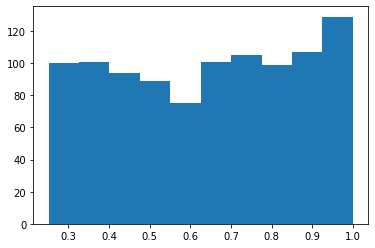

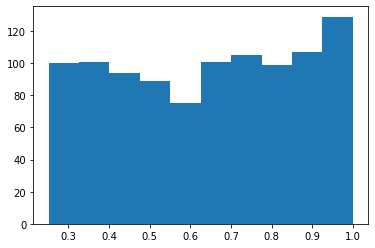

In [36]:
import matplotlib.pyplot as plt

plt.hist(varlist_existing['thinning'])
plt.show()

plt.hist(varlist['thinning'])
plt.show()